In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

In [3]:
#load dataset
df = pd.read_csv('/kaggle/input/housing-price/housing_price_dataset.csv')
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


In [4]:
#basic data preprocessing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


> * All the values are non-null so data cleaning is not required.

In [5]:
#summary statistics
print(df.describe())

         SquareFeet      Bedrooms     Bathrooms     YearBuilt          Price
count  50000.000000  50000.000000  50000.000000  50000.000000   50000.000000
mean    2006.374680      3.498700      1.995420   1985.404420  224827.325151
std      575.513241      1.116326      0.815851     20.719377   76141.842966
min     1000.000000      2.000000      1.000000   1950.000000  -36588.165397
25%     1513.000000      3.000000      1.000000   1967.000000  169955.860225
50%     2007.000000      3.000000      2.000000   1985.000000  225052.141166
75%     2506.000000      4.000000      3.000000   2003.000000  279373.630052
max     2999.000000      5.000000      3.000000   2021.000000  492195.259972


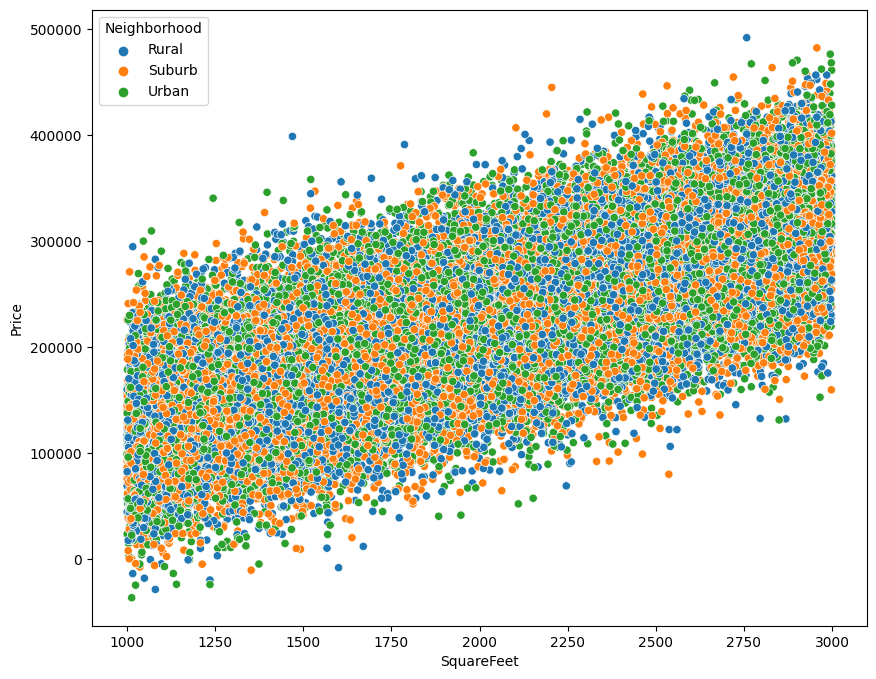

In [6]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='SquareFeet',y='Price',hue='Neighborhood');

* From the plot above there is a positive correlation between the squarefeet and the price

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


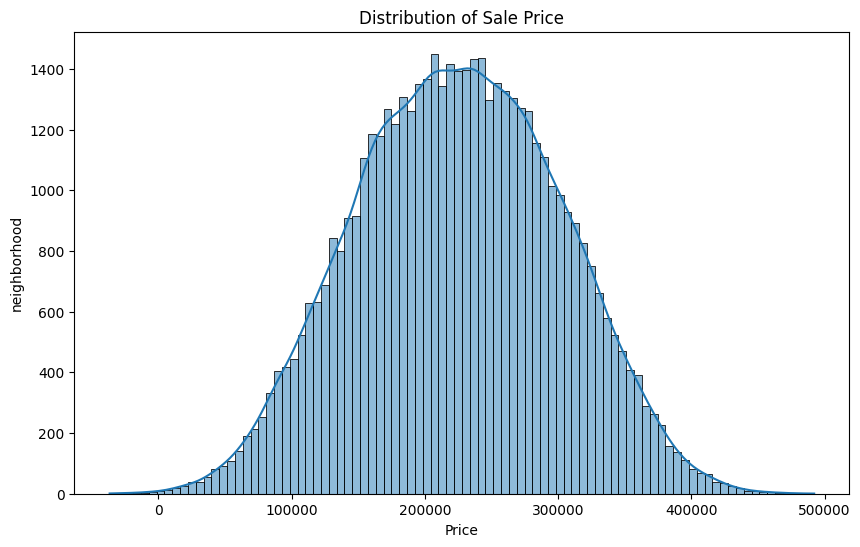

In [7]:
#visualize the distribution of sale price
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True)
plt.title('Distribution of Sale Price')
plt.xlabel('Price')
plt.ylabel('neighborhood')
plt.show()

* the plot above follows gaussian distribution

<function matplotlib.pyplot.legend(*args, **kwargs)>

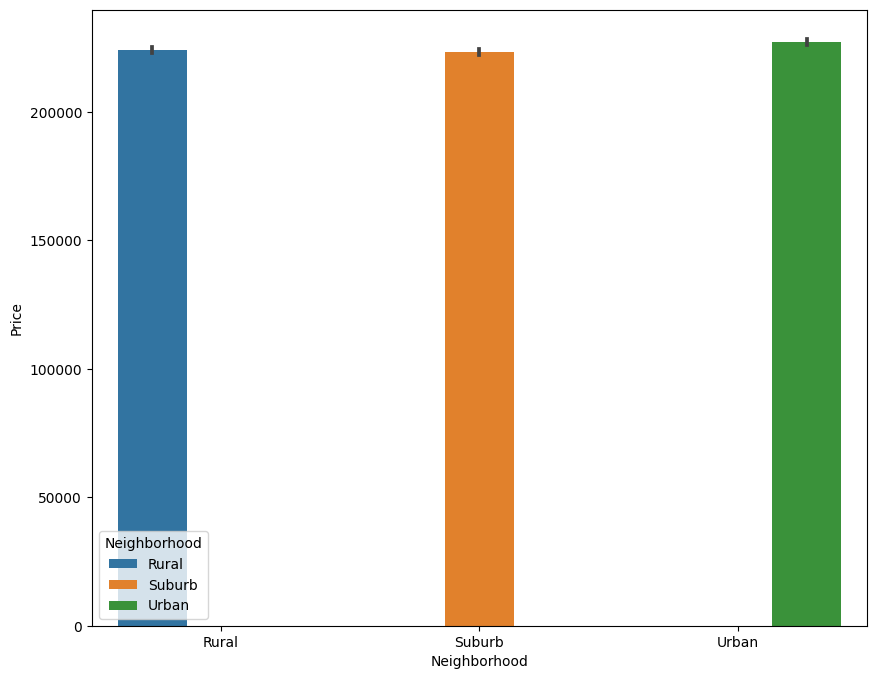

In [8]:
plt.figure(figsize=(10,8))
sns.barplot(df, x='Neighborhood',y='Price',hue='Neighborhood');
plt.legend

* There is equal distribution of data between the three neighborhood

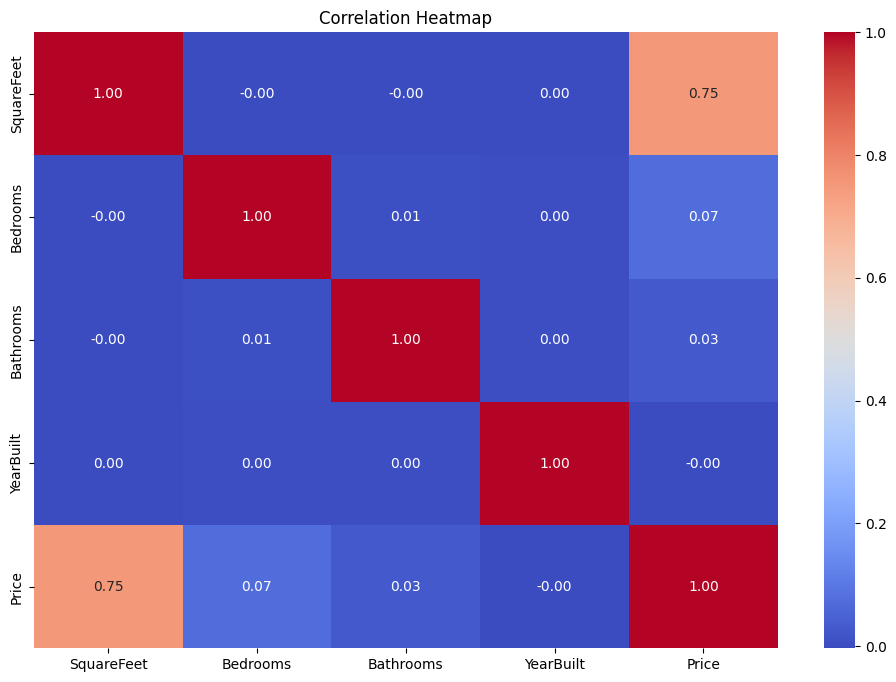

In [9]:
 #Calculate correlation matrix
correlation_matrix = (df[df.select_dtypes(include=np.number).columns.to_list()].corr())

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

**BUILDING AND EVALUATING THE MODEL**

In [17]:
df = pd.get_dummies(df).astype(int)
df.head()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price,Neighborhood_Rural,Neighborhood_Suburb,Neighborhood_Urban
0,2126,4,1,1969,215355,1,0,0
1,2459,3,2,1980,195014,1,0,0
2,1860,2,1,1970,306891,0,1,0
3,2294,2,1,1996,206786,0,0,1
4,2130,5,2,2001,272436,0,1,0


In [19]:
# Split the dataset into features (X) and target variable (y)
X = df.drop('Price', axis=1)
y = df['Price']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [22]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 2436249404.0238967
R-squared: 0.5755628291469783
